In [1]:
import pandas as pd
from omnetpp.scave import results, chart, utils
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plotSize = (10, 10)

results.set_inputs(["data/self2.sca", "data/self2.vec"])

In [6]:
df = results.get_scalars("module =~ ** AND (name =~ miningEarnings:last OR name =~ selfishChain** OR name =~ attackResult:sum)", include_attrs=True, include_fields=True).sort_values(["module", "name"])
df[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
3,SelfishMining.node0.app[0],miningEarnings:last,2.601435e+11,sum(miningEarn),"Mining earnings, last",sat
0,SelfishMining.node0.blockchainManager,attackResult:sum,4.000000e+00,attackResult,"Attack Result, sum",successes
1,SelfishMining.node0.blockchainManager,selfishChainDistance:max,2.000000e+00,selfishChainDistance,"Selfish Chain Distance, max",blocks
18,SelfishMining.node0.blockchainManager,selfishChainDistance:vector:count,1.410000e+02,selfishChainDistance,Selfish Chain Distance,blocks
26,SelfishMining.node0.blockchainManager,selfishChainDistance:vector:endtime,1.659669e+05,selfishChainDistance,Selfish Chain Distance,blocks
24,SelfishMining.node0.blockchainManager,selfishChainDistance:vector:max,2.000000e+00,selfishChainDistance,Selfish Chain Distance,blocks
21,SelfishMining.node0.blockchainManager,selfishChainDistance:vector:mean,4.397163e-01,selfishChainDistance,Selfish Chain Distance,blocks
23,SelfishMining.node0.blockchainManager,selfishChainDistance:vector:min,0.000000e+00,selfishChainDistance,Selfish Chain Distance,blocks
25,SelfishMining.node0.blockchainManager,selfishChainDistance:vector:starttime,1.751560e+02,selfishChainDistance,Selfish Chain Distance,blocks
22,SelfishMining.node0.blockchainManager,selfishChainDistance:vector:stddev,5.525111e-01,selfishChainDistance,Selfish Chain Distance,blocks


In [3]:
df = results.get_scalars("module =~ ** AND (name =~ miningEarnings:last)", include_attrs=True, include_fields=True).sort_values(["module", "name"])
df[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
0,SelfishMining.node0.app[0],miningEarnings:last,2.601435e+11,sum(miningEarn),"Mining earnings, last",sat
1,SelfishMining.node1.app[0],miningEarnings:last,3.401583e+11,sum(miningEarn),"Mining earnings, last",sat
5,SelfishMining.node10.app[0],miningEarnings:last,0.000000e+00,sum(miningEarn),"Mining earnings, last",sat
6,SelfishMining.node11.app[0],miningEarnings:last,0.000000e+00,sum(miningEarn),"Mining earnings, last",sat
7,SelfishMining.node12.app[0],miningEarnings:last,0.000000e+00,sum(miningEarn),"Mining earnings, last",sat
8,SelfishMining.node13.app[0],miningEarnings:last,0.000000e+00,sum(miningEarn),"Mining earnings, last",sat
9,SelfishMining.node14.app[0],miningEarnings:last,0.000000e+00,sum(miningEarn),"Mining earnings, last",sat
10,SelfishMining.node15.app[0],miningEarnings:last,0.000000e+00,sum(miningEarn),"Mining earnings, last",sat
11,SelfishMining.node16.app[0],miningEarnings:last,0.000000e+00,sum(miningEarn),"Mining earnings, last",sat
12,SelfishMining.node17.app[0],miningEarnings:last,0.000000e+00,sum(miningEarn),"Mining earnings, last",sat


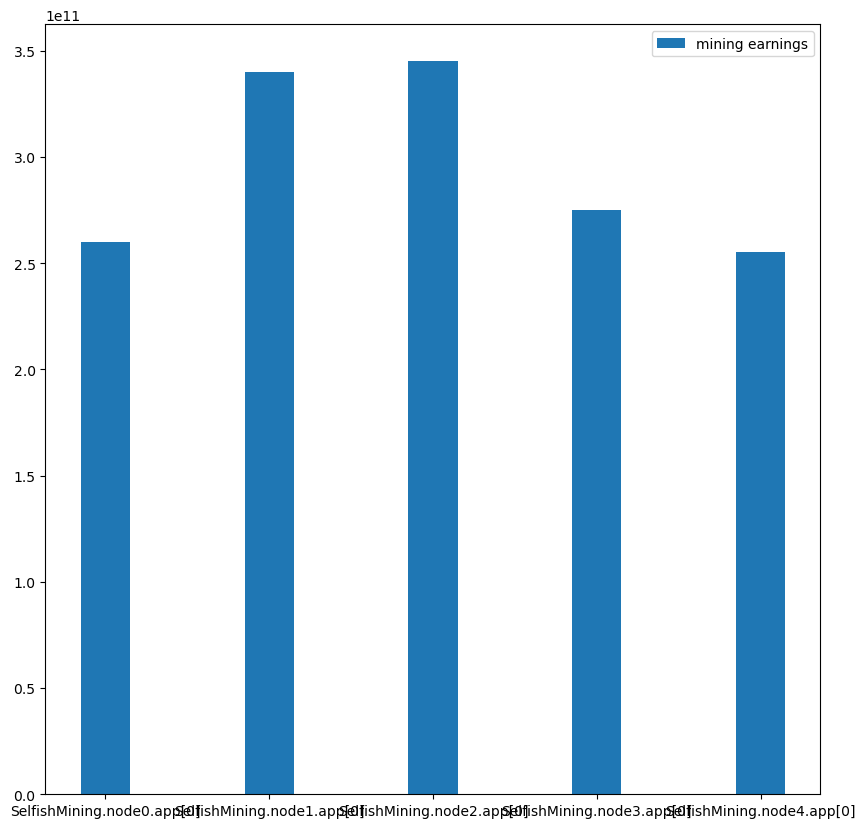

In [4]:
barwidth = 0.3

plt.figure(figsize=plotSize)
view = df[df['value'] > 0]
plt.bar(view['module'], view['value'], barwidth, label="mining earnings")
plt.legend()
plt.show()